In [1]:
%matplotlib inline
import pandas as pd

In [2]:
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [2]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,My Brother's Shadow,2017
1,Crazylove,2005
2,The Outsider,1926
3,P=wp L'Energie Sombre,2015
4,Noor-E-Islam,1957


In [3]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

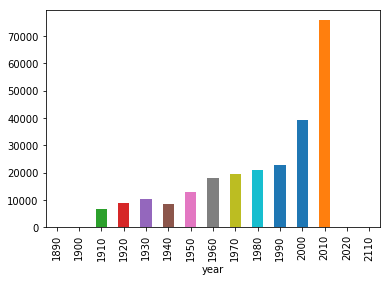

In [8]:
t = titles
t = t.groupby(t['year']//10*10).size().sort_index()
plt1 = t.plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

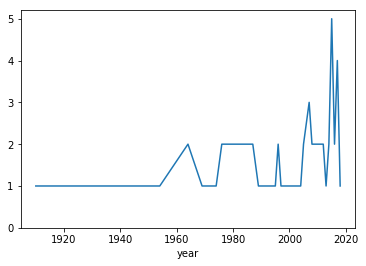

In [22]:
t = titles
t = t[t['title'].apply(lambda x:x.lower()).str.contains('hamlet')]
t = t.groupby('year')
t.size().plot(ylim=0.0)

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [28]:
c = cast
c = c[(c['n']==1) & (c['year']//10*10 == 1950)]
c = c.groupby(['year','type']).size()
c

year  type   
1950  actor      625
      actress    288
1951  actor      651
      actress    285
1952  actor      613
      actress    304
1953  actor      664
      actress    312
1954  actor      636
      actress    316
1955  actor      648
      actress    285
1956  actor      668
      actress    307
1957  actor      739
      actress    315
1958  actor      715
      actress    301
1959  actor      733
      actress    327
dtype: int64

In [43]:
g = c.unstack(1)
g

type,actor,actress
year,,
1950,625,288
1951,651,285
1952,613,304
1953,664,312
1954,636,316
1955,648,285
1956,668,307
1957,739,315
1958,715,301


In [46]:
g['actor'] - g['actress']
g.loc[1950]

type
actor      625
actress    288
Name: 1950, dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [51]:
c = cast
c = c[(c['year']//10*10 == 1950) & (1<= c['n']) & (c['n']<=5)]
g = c.groupby(['n','type'])
g.size()

n    type   
1.0  actor      6692
     actress    3040
2.0  actor      4640
     actress    4635
3.0  actor      5654
     actress    3201
4.0  actor      5663
     actress    2881
5.0  actor      5674
     actress    2592
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [54]:
c = cast
c = c[c['title'] == 'The Pink Panther']
c

,title,year,name,type,character,n
1010,The Pink Panther,2006,William Abadie,actor,Bizu,11.0
15078,The Pink Panther,2006,Scott (II) Adkins,actor,Jacquard,20.0
57923,The Pink Panther,2006,Patrick (III) Anderson,actor,NYC Firefighter,NaN
86621,The Pink Panther,2006,Michael Arthur,actor,Officer #1,NaN
146145,The Pink Panther,1963,John Bartha,actor,Policeman,NaN
169654,The Pink Panther,2006,Dexter Bell,actor,Terry Ahkee-Sauce,33.0
204729,The Pink Panther,1963,Riccardo Billi,actor,Aristotle Sarajos,11.0
218205,The Pink Panther,2006,Antoine Blanquefort,actor,Ballroom Reporter,44.0
238844,The Pink Panther,2006,Davide Borella,actor,Gas-Mask Bandit,50.0
243627,The Pink Panther,2006,David (IV) Boston,actor,Blackjack Dealer,NaN


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

### List each of the characters that Frank Oz has portrayed at least twice.